# Mount Rainier Exploratory Data Analysis

In this notebook we will investigate and understand the structure, patterns, and characteristics of our dataset to uncover insights, detect anomalies, and formulate hypotheses for more in-depth statistical analysis and data visualization.

## Analysis Questions

>**Question 1:** What route has been summited the most? Which has the highest summit success rate? Are they the same?<br>
>**Question 2:** What route has been summited the least? Which has the lowest summit success rate? Are they the same?<br>
>**Question 3:** Is there a relationship between summit success rate and various weather factors?<br>
>**Question 4:** Are there any identifiable patterns in the dataset?<br>
>**Question 5:** Are there outliers in the data?<br>

***

## Import Packages & Data

In [ ]:
# [] Replace all '' with ''
# [] Move general comments on workflow to md
# [] Ensure all comment formatting aligns


In [2]:
# Import Packages

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np


In [3]:
# Import Data

df = pd.read_csv('../data/clean_data.csv')
df.drop(columns = 'Unnamed: 0', inplace= True)
df

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.0,26.321667,19.715000,27.839583,68.004167
1,2015-11-21,Disappointment Cleaver,3,0,0.0,31.300000,21.690708,2.245833,117.549667
2,2015-10-15,Disappointment Cleaver,2,0,0.0,46.447917,27.211250,17.163625,259.121375
3,2015-10-13,Little Tahoma,8,0,0.0,40.979583,28.335708,19.591167,279.779167
4,2015-10-09,Disappointment Cleaver,2,0,0.0,38.260417,74.329167,65.138333,264.687500
...,...,...,...,...,...,...,...,...,...
1858,2014-09-26,Disappointment Cleaver,3,0,0.0,28.238333,100.000000,0.897625,259.645833
1859,2014-09-25,Disappointment Cleaver,2,2,1.0,26.823750,99.854167,3.166208,278.604167
1860,2014-09-25,Disappointment Cleaver,12,6,0.5,26.823750,99.854167,3.166208,278.604167
1861,2014-09-24,Disappointment Cleaver,12,0,0.0,29.702917,100.000000,45.915000,278.054167


***

## Question 1: 
### What route has been summited the most? Which has the highest summit success rate? Are they the same?

In [4]:
# Slice the data and group by the Route 

summit_data = df[['Route', 'Attempted', 'Succeeded']].groupby('Route').sum().reset_index()
summit_data

,Route,Attempted,Succeeded
0,Curtis Ingraham Direct,4,2
1,Disappointment Cleaver,7487,3647
2,Emmons-Winthrop,1462,787
3,Fuhrers Finger,90,13
4,Gibralter Chute,3,0
5,Gibralter Ledges,80,11
6,Ingraham Direct,99,7
7,Kautz Cleaver,17,6
8,Kautz Glacier,523,267
9,Liberty Ingraham Direct,73,32


In [5]:
# Sort the dataframe by 'Succeeded' in descending order
summit_data.sort_values(by=['Succeeded'], ascending=False)

# Disappointment Cleaver is by far the most attempted and successfully summited route

,Route,Attempted,Succeeded
1,Disappointment Cleaver,7487,3647
2,Emmons-Winthrop,1462,787
8,Kautz Glacier,523,267
10,Little Tahoma,147,56
9,Liberty Ingraham Direct,73,32
3,Fuhrers Finger,90,13
5,Gibralter Ledges,80,11
13,Ptarmigan Ingraham Direct,19,9
6,Ingraham Direct,99,7
7,Kautz Cleaver,17,6


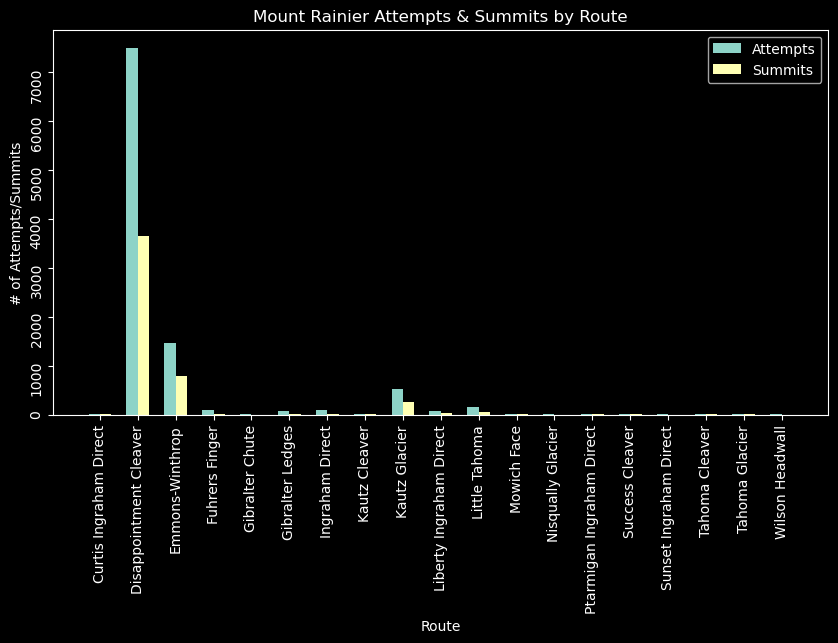

In [6]:
# Plot the attempts and summits on a double column chart

# Define X and Y axis data
X = summit_data['Route']
Y1 = summit_data['Attempted']
Y2 = summit_data['Succeeded']

# Define the # of column pairs to plot (i.e., # of routes)
N = summit_data['Route'].nunique()

# Define the position of columnts on x-axis
ind = np.arange(N)

# Define the width of each column
width = 0.3

# Define plot formatting & labels
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.set_title('Mount Rainier Attempts & Summits by Route')
ax.set_ylabel('# of Attempts/Summits')
ax.set_xlabel('Route')
ax.tick_params(rotation=90)

# Plot the chart
ax.bar(ind, Y1, width, label='Attempts')
ax.bar(ind+width, Y2, width, label='Summits')

# Set the legend to the best location
plt.legend(loc='best')

# Set the x-axis labels
plt.xticks(ind+width/2, X)

# Show the plot
plt.show()

In [7]:
# Calculate an aggregated summit rate for each route and sort by summit rate in descending order.

summit_data['Summit_Rate']=summit_data['Succeeded']/summit_data['Attempted']
summit_data.sort_values(by=['Summit_Rate'], ascending=False)

# The Tahoma Cleaver has the highest summit rate of 100%, however the route has only three attempts. 
# Emmons-Winthrop has the second highest summit rate of 53.8% with 1462 attempts

,Route,Attempted,Succeeded,Summit_Rate
16,Tahoma Cleaver,3,3,1.000000
2,Emmons-Winthrop,1462,787,0.538304
8,Kautz Glacier,523,267,0.510516
0,Curtis Ingraham Direct,4,2,0.500000
1,Disappointment Cleaver,7487,3647,0.487111
13,Ptarmigan Ingraham Direct,19,9,0.473684
9,Liberty Ingraham Direct,73,32,0.438356
10,Little Tahoma,147,56,0.380952
17,Tahoma Glacier,11,4,0.363636
7,Kautz Cleaver,17,6,0.352941


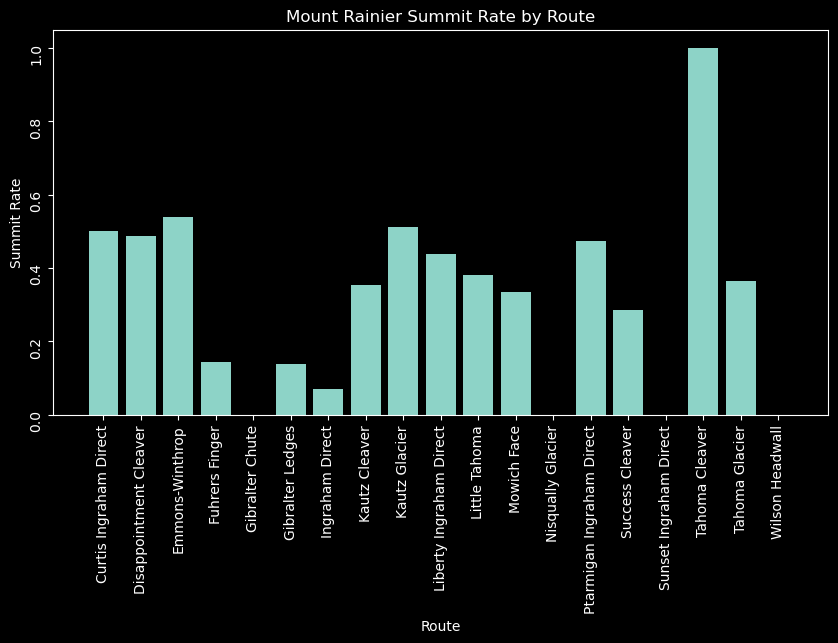

In [8]:
# Plot the summit-rate on a bar chart

X = summit_data['Route']
Y = summit_data['Summit_Rate']

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.set_title('Mount Rainier Summit Rate by Route')
ax.set_ylabel('Summit Rate')
ax.set_xlabel('Route')
ax.tick_params(rotation=90)
ax.bar(X, Y)
fig
plt.show()


***

## Question 1 Answer:

The **Disappointment Cleaver** was by far the most summited route with **3647 summits**, however it did not have the highest summit success rate. The **Emmons-Winthrop** route had the highest meaningful **summit rate of 53.8%**. We can further analyse the data to determine whether Emmons-Winthrop had a higher success rate due to weather at the time of the summits, or if the Emmons-Winthrop had a higher success rate due to it being an easier (although less popular, indicated by the lower number of attempts) route. Refer to Question 1A for additional analysis.

## Question 2: 
### What route has been summited the least? Which has the lowest summit success rate? Are they the same?

## Question 2 Answer:

Based upon the analysis performed above in Question 1, **Nisqually Glacier, Sunset Ingraham Direct, Gibralter Chute, and Wilson Headwall all have zero summits recorded**. Similarly, these routes have the lowest **summit success rate of 0.0%**. The lowest non-zero summit rate is on the **Ingraham Direct** route with a **success rate of 7.1%**. 

***

# Follow-Up Question 1A: 
### Did Emmons-Winthrop have a higher summit rate due to better temperatures at the time of summit compared to Disappointment Cleaver?

In [9]:
# Find average weather across all summits of Emmons-Winthrop
# Compare to that of Disappointment Cleaver

In [26]:
#Create data subset to include only successful summits of Emmons-Winthrop
emmons_data = df.loc[(df['Route'] == 'Emmons-Winthrop') & (df['Succeeded']>0)]
emmons_data

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
129,2015-08-26,Emmons-Winthrop,2,1,0.50,41.950833,54.233750,35.899167,22.134583
174,2015-08-21,Emmons-Winthrop,4,4,1.00,43.208750,14.296333,19.141750,19.629583
217,2015-08-17,Emmons-Winthrop,9,9,1.00,46.553333,30.253750,6.036208,252.915000
237,2015-08-15,Emmons-Winthrop,4,4,1.00,41.627917,19.561833,7.595542,228.682500
267,2015-08-12,Emmons-Winthrop,2,2,1.00,51.375833,46.140417,6.673708,171.633375
...,...,...,...,...,...,...,...,...,...
1508,2015-06-04,Emmons-Winthrop,3,3,1.00,34.461667,62.994167,4.006708,164.186250
1522,2015-06-04,Emmons-Winthrop,4,4,1.00,34.461667,62.994167,4.006708,164.186250
1548,2015-05-30,Emmons-Winthrop,2,2,1.00,40.171250,36.868333,9.813375,247.190417
1608,2015-05-27,Emmons-Winthrop,4,3,0.75,34.457500,73.665417,4.211208,194.570833


In [28]:
# Repeat for Disappointment Cleaver

dc_data = df.loc[(df['Route'] == 'Disappointment Cleaver') & (df['Succeeded']>0)]
dc_data

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
10,2015-09-28,Disappointment Cleaver,12,4,0.333333,38.335417,27.025417,17.115208,270.866667
11,2015-09-27,Disappointment Cleaver,12,6,0.500000,35.105000,23.768333,4.557083,188.213583
13,2015-09-26,Disappointment Cleaver,12,3,0.250000,27.322083,59.469917,15.730750,216.342500
15,2015-09-25,Disappointment Cleaver,12,9,0.750000,32.390417,95.305833,61.387500,261.033333
16,2015-09-25,Disappointment Cleaver,11,6,0.545455,32.390417,95.305833,61.387500,261.033333
...,...,...,...,...,...,...,...,...,...
1851,2014-09-26,Disappointment Cleaver,3,3,1.000000,28.238333,100.000000,0.897625,259.645833
1853,2014-09-26,Disappointment Cleaver,4,3,0.750000,28.238333,100.000000,0.897625,259.645833
1854,2014-09-26,Disappointment Cleaver,8,6,0.750000,28.238333,100.000000,0.897625,259.645833
1859,2014-09-25,Disappointment Cleaver,2,2,1.000000,26.823750,99.854167,3.166208,278.604167


In [31]:
# Compare summary statistics between emmons_data and dc_data

emmons_data.describe()

,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,5.488095,4.684524,0.897484,42.073180,46.028647,9.752054,139.847633
std,3.621275,2.940813,0.173106,8.052855,19.085636,7.677505,90.377809
min,2.000000,1.000000,0.333333,27.265000,12.449875,0.753458,19.629583
25%,3.000000,2.000000,0.833333,34.931042,35.206667,4.160083,33.321667
50%,4.000000,4.000000,1.000000,39.889167,46.075625,7.444625,151.438125
75%,8.000000,6.000000,1.000000,48.941250,55.712917,13.650865,216.443771
max,12.000000,12.000000,1.000000,56.153750,97.869167,35.899167,278.591667


In [30]:
dc_data.describe()

,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,6.670000,5.210000,0.854239,42.145252,46.467099,9.579974,147.153422
std,4.216388,3.174949,0.203671,8.004310,21.263234,8.303076,91.330075
min,1.000000,1.000000,0.090909,18.645167,12.363500,0.753458,13.969167
25%,3.000000,2.000000,0.727273,35.880833,29.615417,4.313750,33.937083
50%,5.000000,4.000000,1.000000,41.117917,46.140417,6.444208,162.330833
75%,12.000000,8.000000,1.000000,48.796042,56.533750,13.343792,227.901208
max,12.000000,12.000000,1.000000,56.153750,100.000000,61.387500,280.383333


### Question 1A Answer

Interestingly, the average weather on the days in which there had been at least one successful summit did significantly vary between Emmons and Disappointment. Based on this, we may conclude that perhaps weather conditions was not the reason for Emmons having a higher summit rate as compared to Disappointment, despite having a significantly lower total number of summits.

There are countless other reasons as to why this is the case. For example, the Emmons route may be easier to summit overall when compared to Disappointment, the Disappointment summit rate may be skewed as significantly more people made attempts (where as perhaps only experienced climbers attempot Emmons, and therefore have a higher chance of summitting), or there are other qualitative factors related to the expertise and skillset of the climbers or the route itself (e.g., whether the route requires mixed-climbing, dry-tooling, ice-climbing, etc.). None of these are captured within the current dataset, therefore further analysis cannot be performed at this time.

*** 

## Question 3: 
### Is there a relationship between summit success rate and various weather factors?

### Correlation Coefficient
The correlation coefficient will help us determine whether there is a linear relationship between two parameters (i.e., magnitude != 0) and what the direction of the relationship is (i.e., positive or negative), if any.

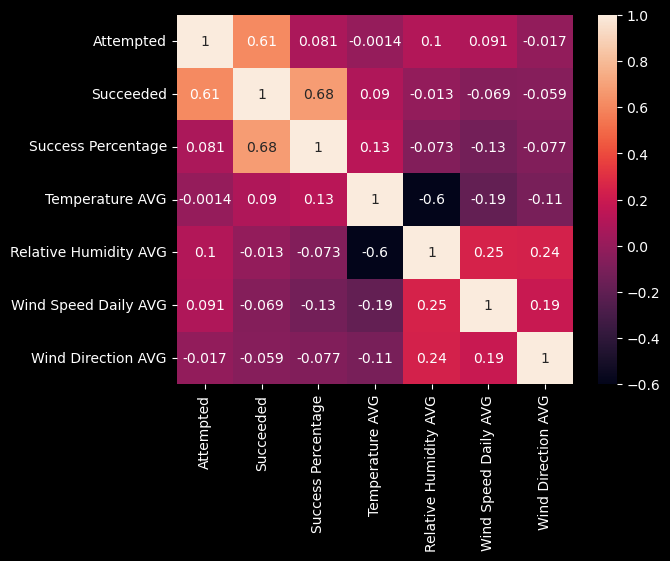

In [11]:
# Plot the correlation 
sns.heatmap(df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20, 7)

## Question 3 Answer:

>*Summit Success & Temperature:*
<br>
<br>
>There is a small positive correlation **(0.13)** between the average temperature and the success percentage of the climb. 
>As temperature increases, the success rate tends to increase.
<br>
<br>

>*Summit Success & Humidity* 
<br>
<br>
>There is a small negative correlation **(-0.07)** between the average relative humidity and the success percentage of the climb.
>As humidity increases, the success rate tends to decrease.
<br>
<br>

>*Summit Success & Wind Speed*
<br>
<br>
>There is a small negative correlation **(-0.13)** between the average daily wind speed and the success percentage of the climb.
>As wind speed increases, the success rate tends to decrease.
<br>
<br>

>*Summit Success & Wind Direction*
<br>
<br>
>There is a small negative correlation **(-0.08)** between the average wind direction and the success percentage of the climb.
>As wind direction increases (i.e., moves clockwise from the north), the success rate tends to decrease.
>This interpretation however is difficult to understand as wind direction would be better understood as a categorical value as opposed to numeric. This change will be made in developing the model.
<br>
<br>

The conclusion is that while there is evidence of a linear relationship between the weather factors and summit success rate, the magnitude of the relationship is quite small. 

***

## Question 4:
### Are there any identifiable patterns in the dataset?

### Time-Series Analysis
This tool will be used to identify trends across the time-period of the dataset.
<br>
<br>

*Hypothesis:* There are duplicate dates within the dataset, resulting from multiple routes being attempted in the same day.

In [12]:
# First, determine the number of rows in the dataset
df['Date'].value_counts().sum()

1863

In [13]:
# Determine the number of unique dates within the dataset
df['Date'].nunique()

203

*Conclusion:* There are 203 unique dates within the dataset and 1863 rows, therefore there are numerous duplicate dates resulting from multiple routes being attempted in the same day. 
<br>
<br>
<br>

For the purposes of performing the time-series analysis, we will aggregate the attempts and successful summits on all routes in a given day to simplify the analysis. To preserve the route detail, upon aggregation we will take the most common route on that day (Mode) as a categorical datatype

In [14]:
df.columns

Index(['Date', 'Route', 'Attempted', 'Succeeded', 'Success Percentage',
       'Temperature AVG', 'Relative Humidity AVG', 'Wind Speed Daily AVG',
       'Wind Direction AVG'],
      dtype='object')

In [15]:
#Transform the dataset to aggregate on the Date

ts_data = df.groupby(['Date'], as_index = False)['Date','Route', 'Attempted', 'Succeeded',
                               'Success Percentage', 'Temperature AVG', 'Relative Humidity AVG',
                               'Wind Speed Daily AVG', 'Wind Direction AVG'].agg(
                                   {'Route' : lambda x:x.value_counts().index[0], # lambda function returns the route at the top of the value_counts list
                                    'Attempted' : 'sum',
                                    'Succeeded' : 'sum',
                                    'Success Percentage' : 'mean',
                                    'Temperature AVG': 'mean',
                                    'Relative Humidity AVG': 'mean',
                                    'Wind Speed Daily AVG': 'mean',
                                    'Wind Direction AVG': 'mean',
                                    })

# Re-calculate the aggregated success percentage
ts_data['Success Percentage'] = ts_data['Succeeded'] / ts_data['Attempted']
ts_data.columns

# Convert Date to datetime format
ts_data['Date'] = pd.to_datetime(ts_data['Date'])

/var/folders/zz/3jhwjldd6x9cm07c2zrzznf00000gn/T/ipykernel_17781/1078657126.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts_data = df.groupby(['Date'], as_index = False)['Date','Route', 'Attempted', 'Succeeded',


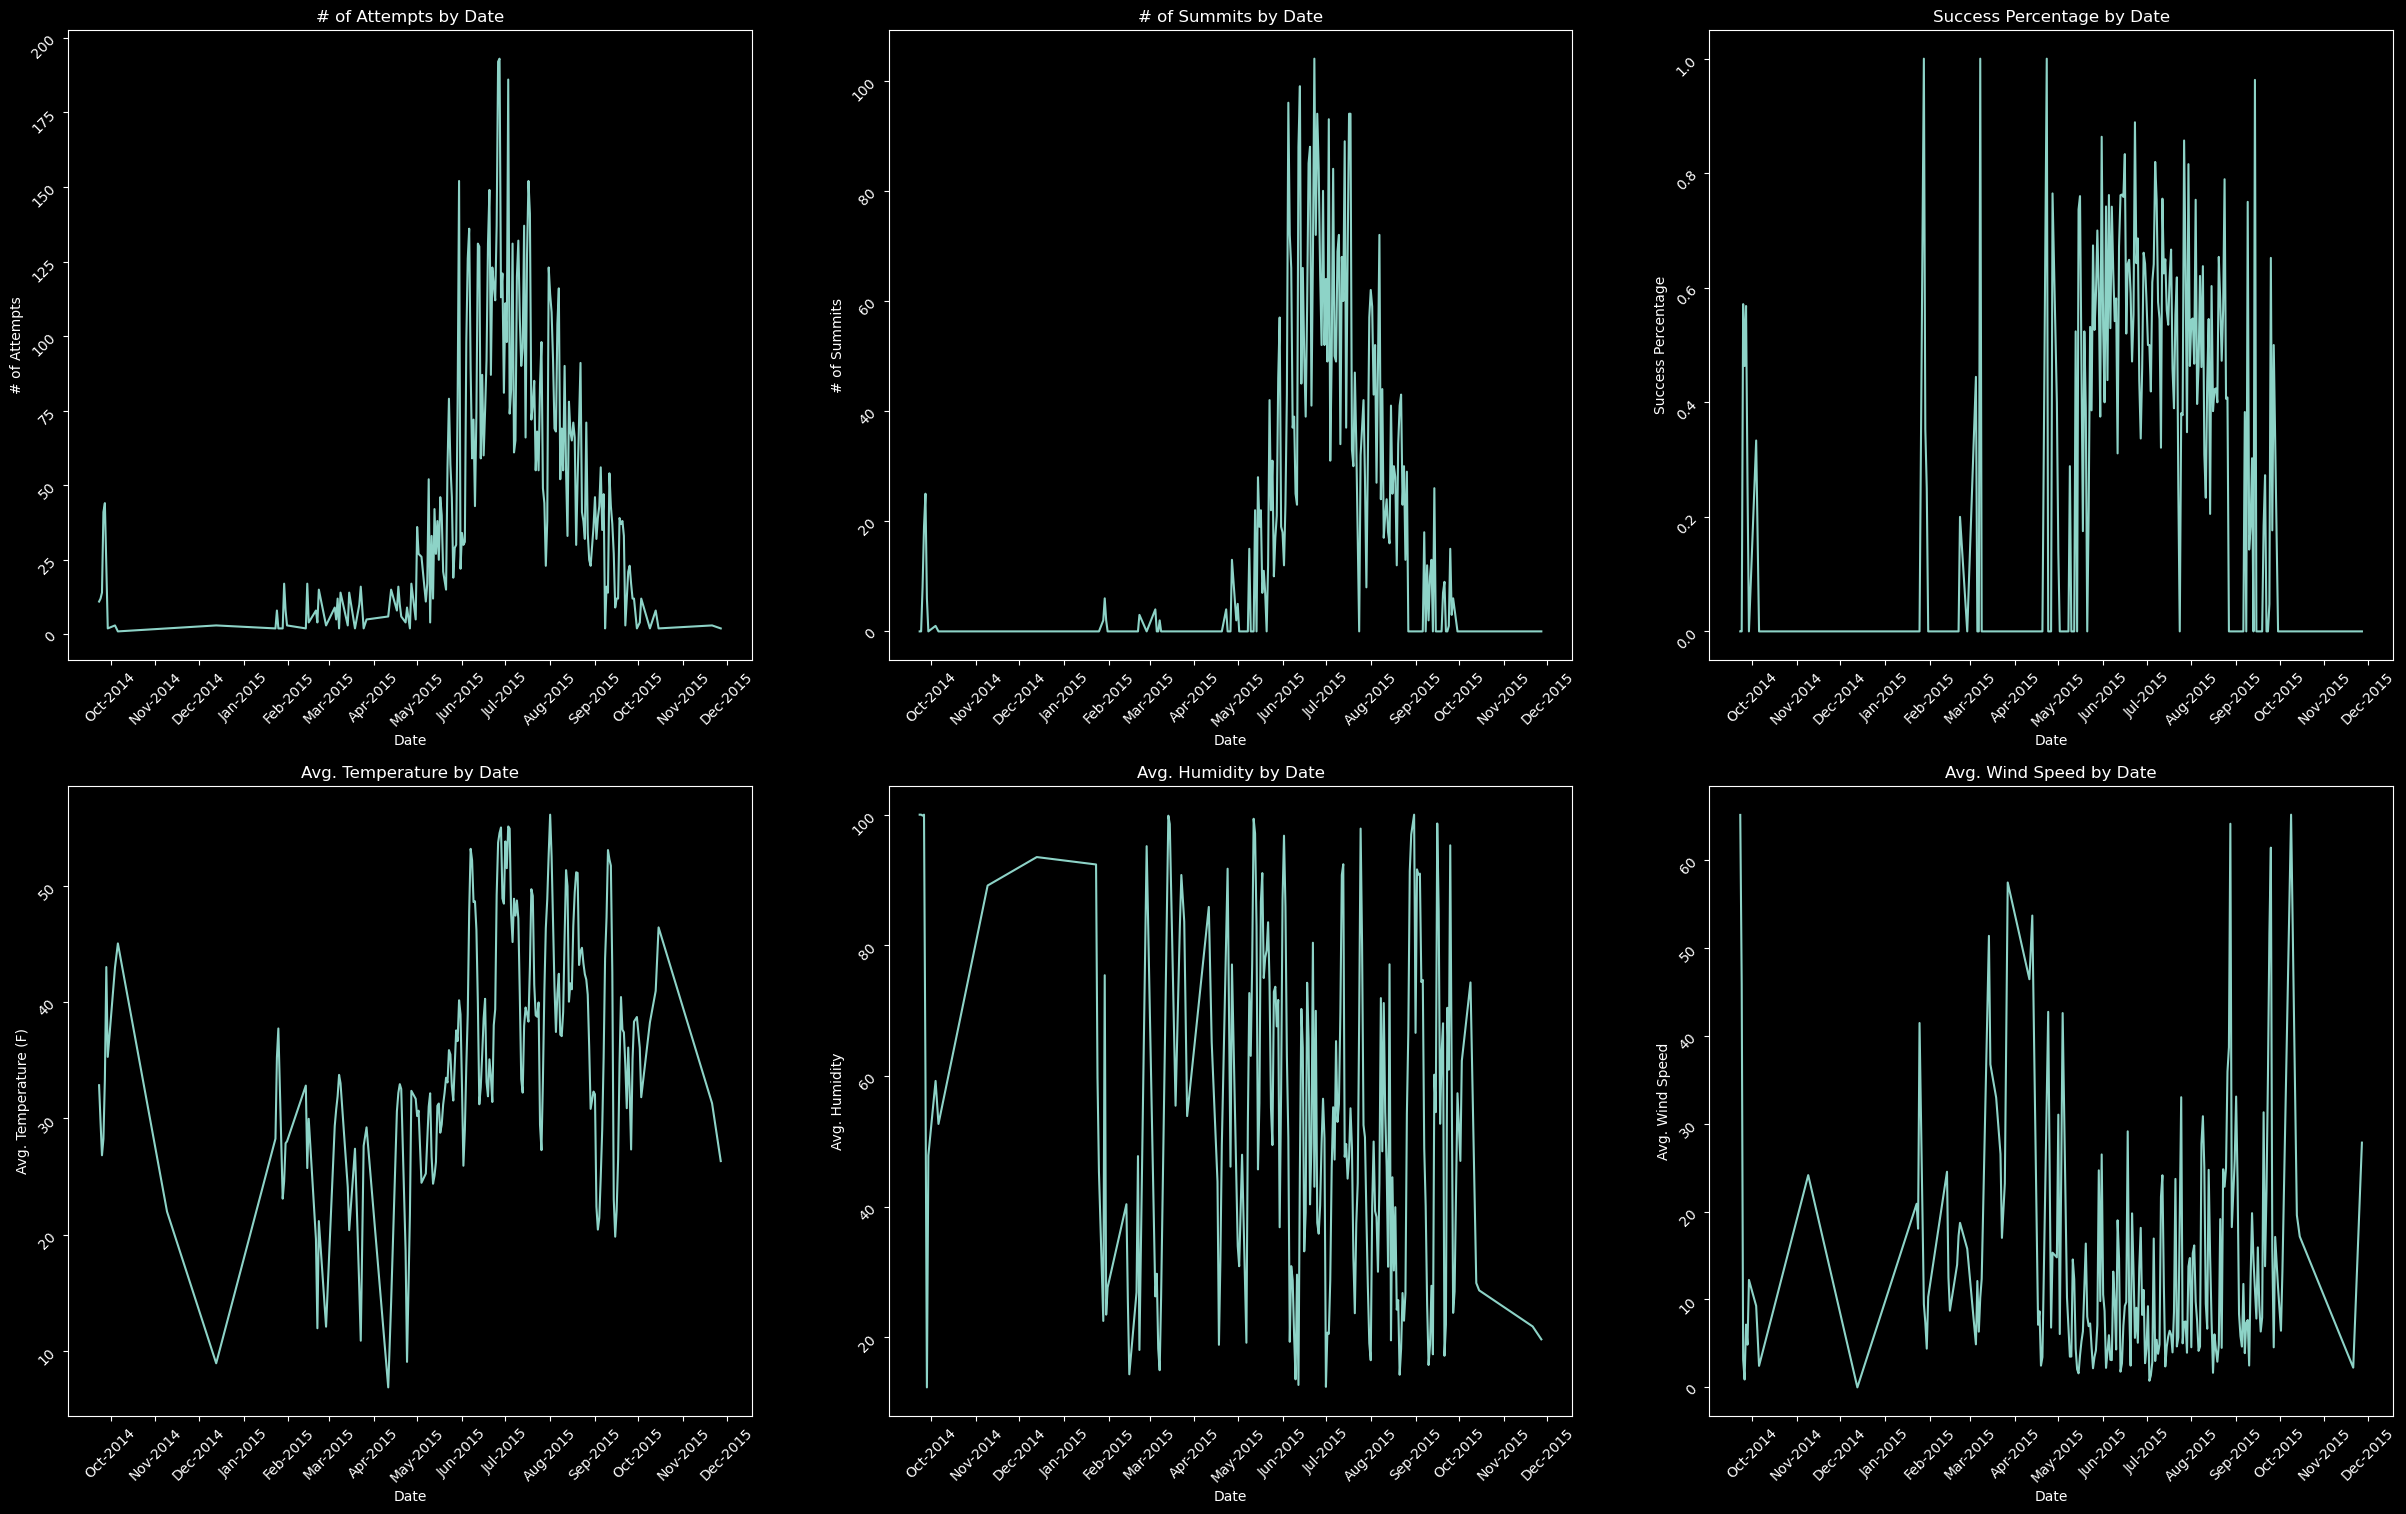

In [16]:
# Plot time-series graphs for each of the numerical values, with Date as the x-axis
X = ts_data['Date']
Y1 = ts_data['Attempted']
Y2 = ts_data['Succeeded']
Y3 = ts_data['Success Percentage']
Y4 = ts_data['Temperature AVG']
Y5 = ts_data['Relative Humidity AVG']
Y6 = ts_data['Wind Speed Daily AVG']

# Wind Direction will not be plotted as the visualization will not be meaningful

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3)
fig.set_size_inches(30,18)

#Format AX1
ax1.set_title('# of Attempts by Date')
ax1.set_ylabel('# of Attempts')
ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax1.tick_params(rotation=45)

#Format AX2
ax2.set_title('# of Summits by Date')
ax2.set_ylabel('# of Summits')
ax2.set_xlabel('Date')
ax2.set_xticklabels([])
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax2.tick_params(rotation=45)

#Format AX3
ax3.set_title('Success Percentage by Date')
ax3.set_ylabel('Success Percentage')
ax3.set_xlabel('Date')
ax3.set_xticklabels([])
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax3.tick_params(rotation=45)

#Format AX4
ax4.set_title('Avg. Temperature by Date')
ax4.set_ylabel('Avg. Temperature (F)')
ax4.set_xlabel('Date')
ax4.set_xticklabels([])
ax4.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax4.tick_params(rotation=45)

#Format AX5
ax5.set_title('Avg. Humidity by Date')
ax5.set_ylabel('Avg. Humidity')
ax5.set_xlabel('Date')
ax5.set_xticklabels([])
ax5.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax5.tick_params(rotation=45)

#Format AX6
ax6.set_title('Avg. Wind Speed by Date')
ax6.set_ylabel('Avg. Wind Speed')
ax6.set_xlabel('Date')
ax6.set_xticklabels([])
ax6.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax6.tick_params(rotation=45)


#Plot charts
ax1.plot(X, Y1)
ax2.plot(X, Y2)
ax3.plot(X, Y3)
ax4.plot(X, Y4)
ax5.plot(X, Y5)
ax6.plot(X, Y6)

plt.show()


### Pair-Plot Analysis
This tool will be used to identify trends/patterns across two dimensions within the dataset.
<br>
<br>

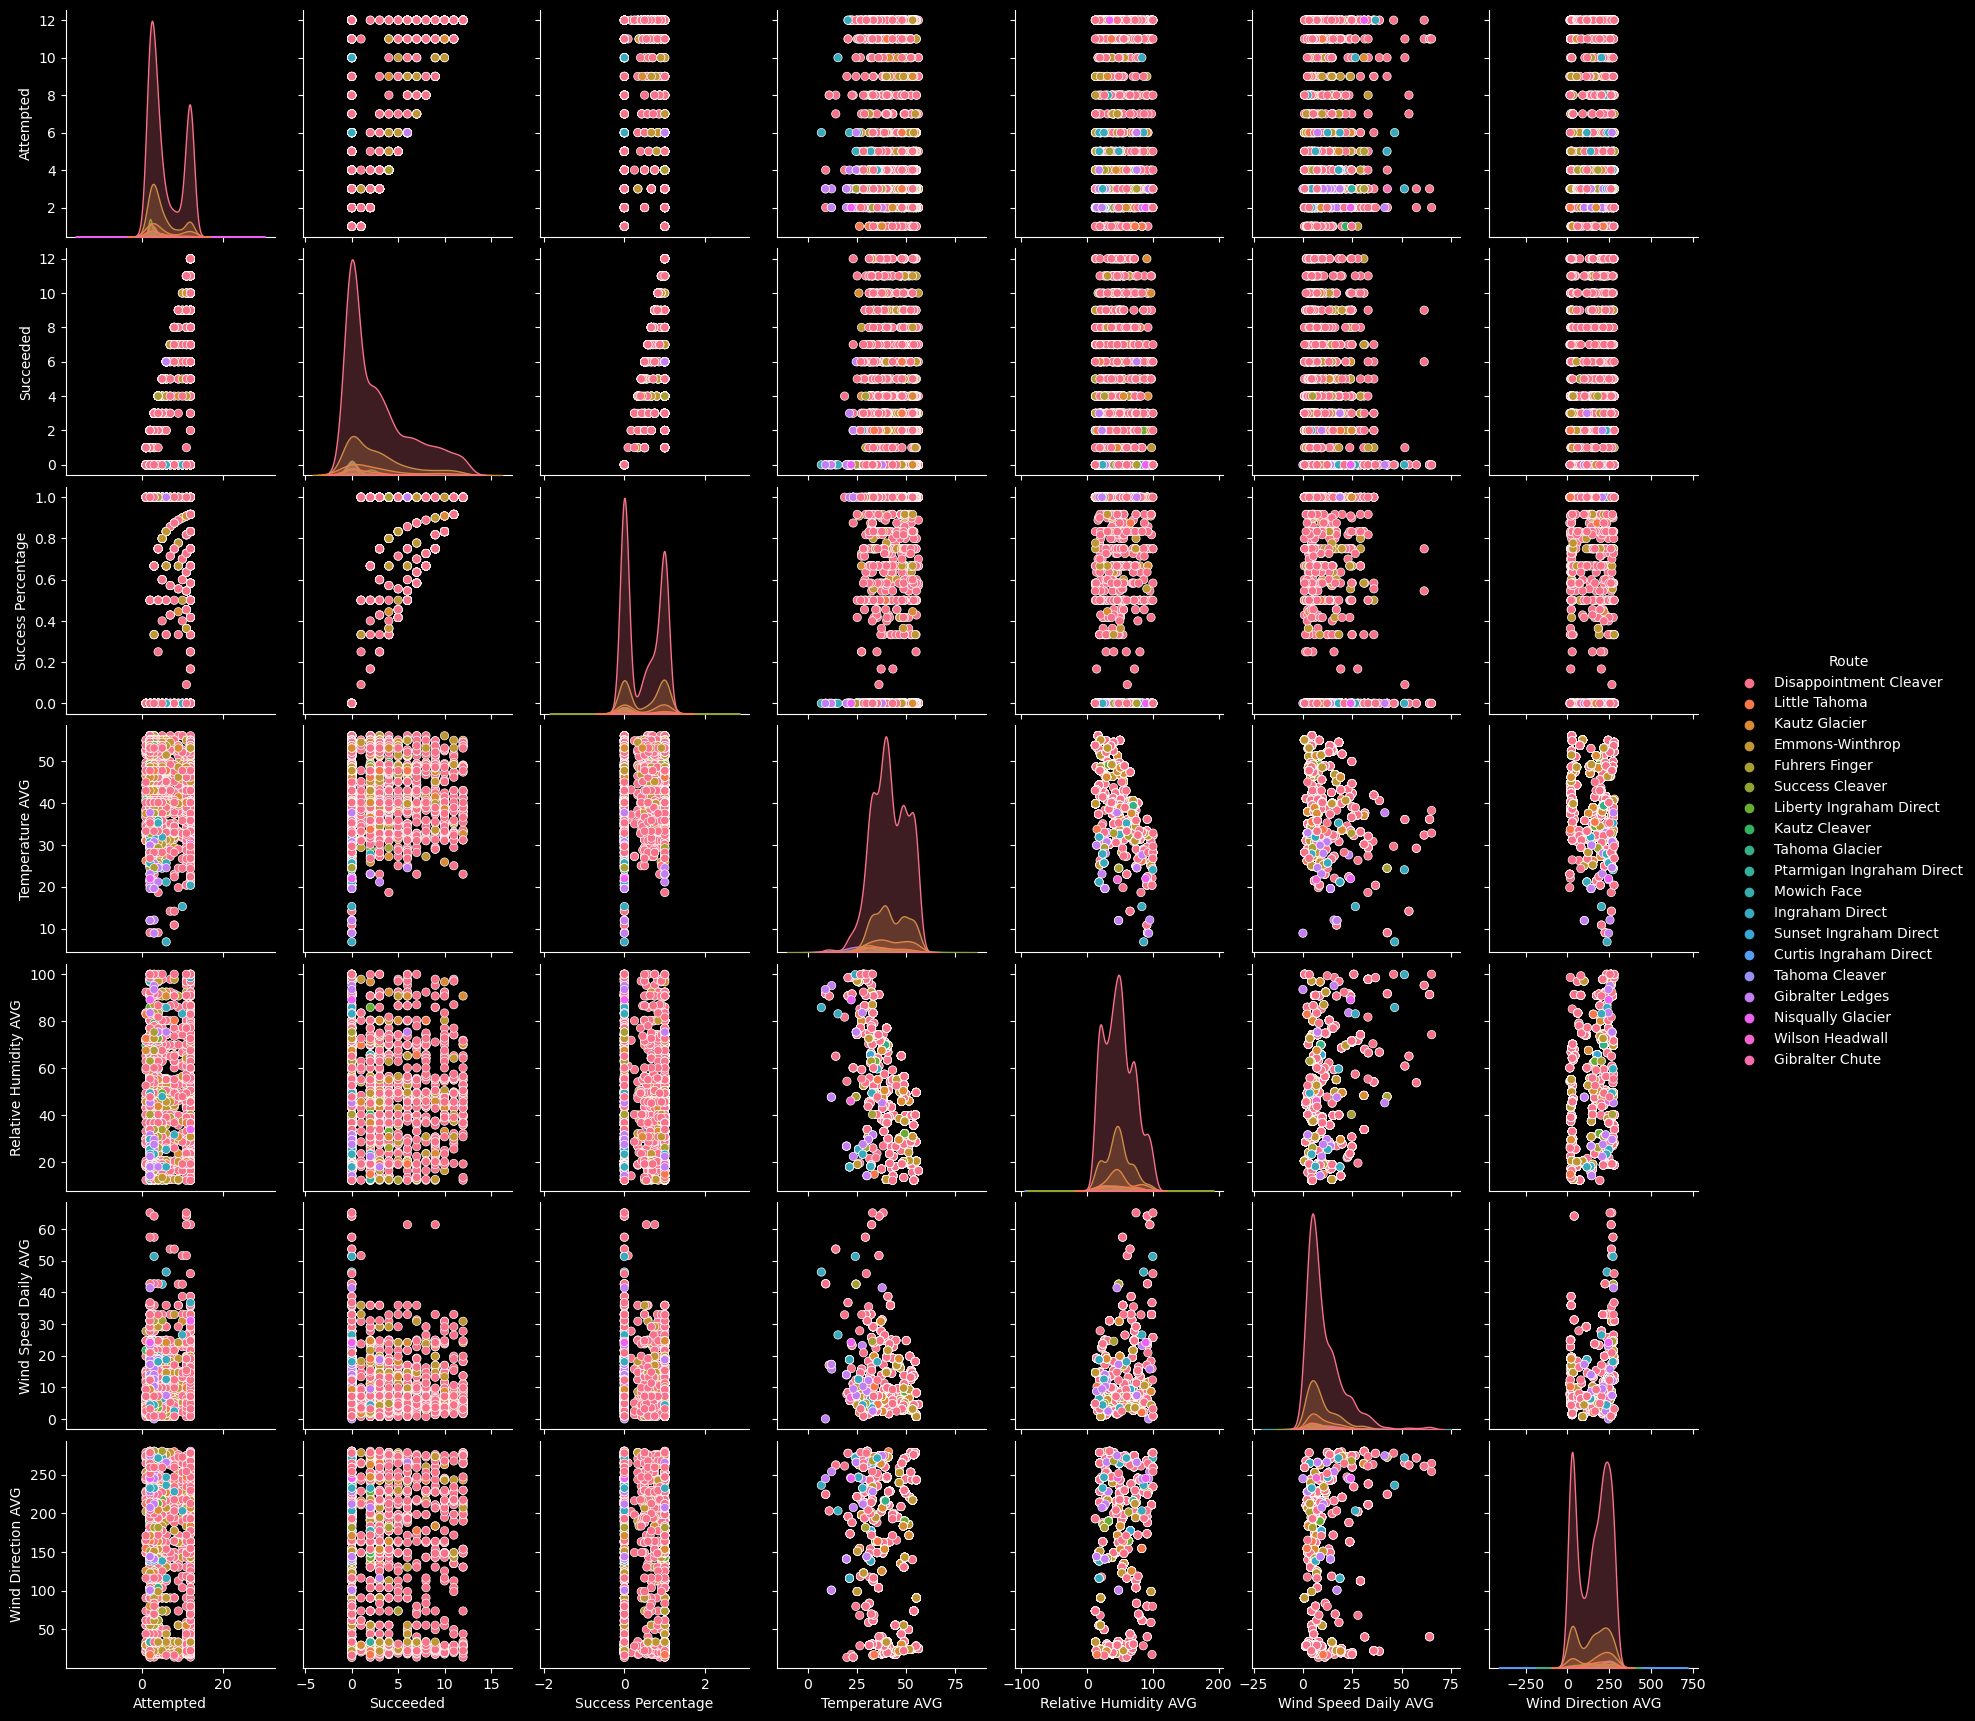

In [17]:
# Generate pair plot

sns.pairplot(df, hue='Route')
plt.show()

## Question 4 Answer:

>*Attempts & Summits:*
<br>
<br>
>The vast majority of attempts and summits took place during the months of May 2015 to October 2015, which corresponds to the months that saw the highest average temperature (i.e., the summer months).
> This makes sense as climbers would be inclined to attempt a summit during the summer when the weather conditions are most optimal.
>Similarly the summit success percentage was highest during the same time frame.
<br>
<br>

>*Humidity* 
<br>
<br>
>The average humidity was quite volatile throughout the time period.
>During the summer months hummidity ranged from between 100% - 10%.
<br>
<br>


The conclusion is that there is a seasonality trend within the climbing statistics and weather data, which aligns with expecatations based on the nature of the data.

## Question 5:
### Are there any outliers in the data?

To perform this analysis, we will simply use a boxplot to idenfiy any outliers

<AxesSubplot:>

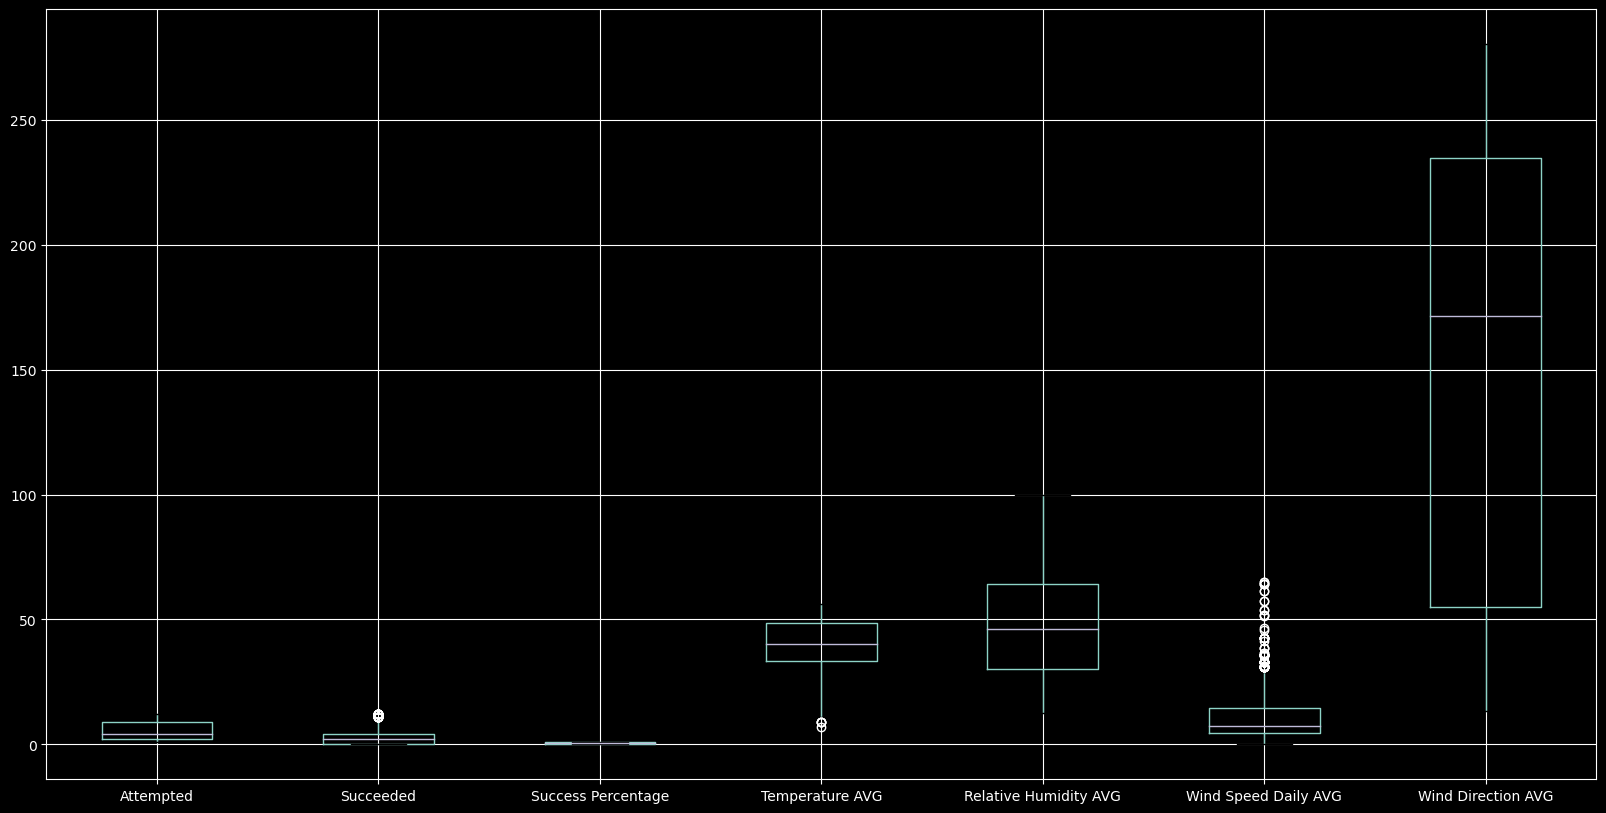

In [18]:
# Generate Box-Plot to identify outliers and data skewing
df.boxplot(figsize=(20,10))

# The outliers noted will not be dealt with at this time
# Refer to the model notebook for treatment of the outliers

## Question 4 Answer:

There are a significant number of outliers within the Wind Speed dimension, which is due to the highly skewed nature of the data. Additionally, there are some outliers in the Succeeded and Temperature dimensions.